## Compute overall fraction of acceptable / unacceptable

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

df = pd.read_csv('../data/interim/user-data.csv')
df['ones'] = 1
df = df.rename(columns={"Acceptable": "Unacceptable"})

# game launch and level start
colors = ['#648FFF', '#785EF0', '#DC267F', '#FE6100', '#FFB000']

In [6]:
metrics = {
    'acceptable': (df['Unacceptable'] == 0).sum(),
    'unacceptable': (df['Unacceptable'] == 1).sum()
}

In [7]:
print(metrics)

{'acceptable': 1920, 'unacceptable': 195}


In [8]:
FONT_SIZE = 15
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : FONT_SIZE}

plt.rc('font', **font)

## Unacceptable versus length

In [9]:
def plotSeries(x, y, color1, color2, label):
    coef = np.polyfit(x, y, 1)
    poly1d_fn = np.poly1d(coef)
    plt.plot(x, poly1d_fn(x), '--', color=color2, label=label + "\nR-squared = {:.3f}".format(r2_score(y, poly1d_fn(x))) + ", Slope = {:.3f}".format(coef[0]))
    ci = 1.645 * np.std(y) / np.sqrt(len(x))
    plt.fill_between(x, (poly1d_fn(x)-ci), (poly1d_fn(x)+ci), color=color2, alpha=.1)
    plt.scatter(x, y, c=color1)
    plt.legend(loc="upper left")

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


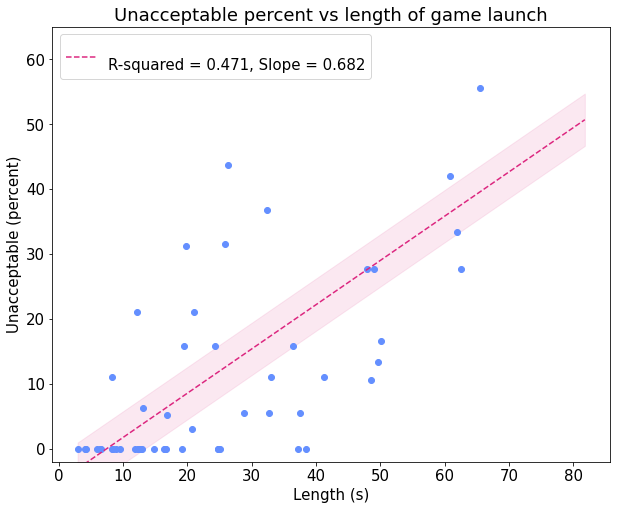

In [10]:
reduced = df[df['Type'] == 'load']
reduced = reduced.groupby(['Time'])[['Unacceptable', 'ones']].sum()
reduced['Unacceptable %'] = reduced['Unacceptable'] / reduced['ones'] * 100

title = 'Unacceptable percent vs length of game launch'

plt.figure(figsize=(10, 8))
x = reduced.index
y = reduced['Unacceptable %']
plt.xlabel('Length (s)')
plt.ylabel('Unacceptable (percent)')
plt.title(title)

plotSeries(x, y, colors[0], colors[2], "")

plt.ylim(-2, 65)
plt.savefig(title + '.png')
plt.show()

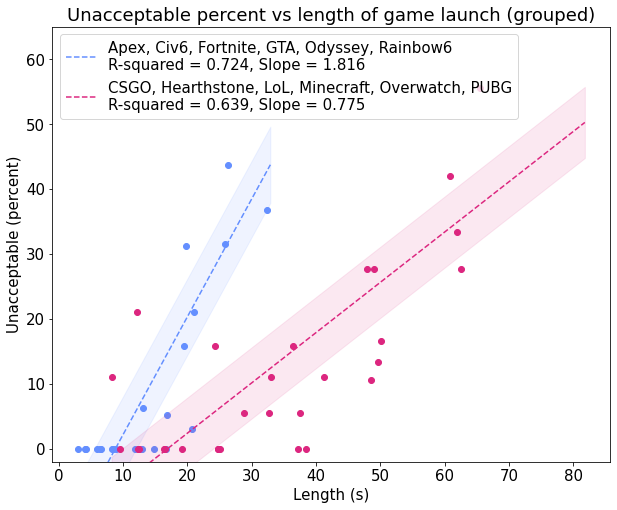

In [11]:
reduced_blue = df.query( 'Game == ["csgo","hearthstone","lol","minecraft","overwatch","pubg"]' )
reduced_blue = reduced_blue[reduced_blue['Type'] == 'load']
reduced_blue = reduced_blue.groupby(['Time'])[['Unacceptable', 'ones']].sum()
reduced_blue['Unacceptable %'] = reduced_blue['Unacceptable'] / reduced_blue['ones'] * 100

reduced_red = df.query( 'Game == ["apex","civ6","gta","fortnite","odyssey","rainbow6"]' )
reduced_red = reduced_red[reduced_red['Type'] == 'load']
reduced_red = reduced_red.groupby(['Time'])[['Unacceptable', 'ones']].sum()
reduced_red['Unacceptable %'] = reduced_red['Unacceptable'] / reduced_red['ones'] * 100

title = 'Unacceptable percent vs length of game launch (grouped)'

plt.figure(figsize=(10, 8))
xb = reduced_blue.index
yb = reduced_blue['Unacceptable %']
xr = reduced_red.index
yr = reduced_red['Unacceptable %']
plt.xlabel('Length (s)')
plt.ylabel('Unacceptable (percent)')
plt.title(title)

plotSeries(xb, yb, colors[0], colors[0], "Apex, Civ6, Fortnite, GTA, Odyssey, Rainbow6")

plotSeries(xr, yr, colors[2], colors[2], "CSGO, Hearthstone, LoL, Minecraft, Overwatch, PUBG")

plt.ylim(-2, 65)

plt.savefig(title + '.png')
plt.show()

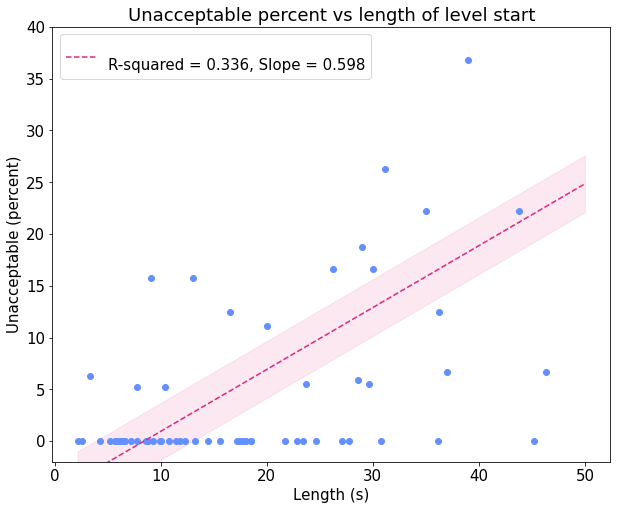

In [12]:
reduced = df[df['Type'] == 'level']
reduced = reduced.groupby(['Time'])[['Unacceptable', 'ones']].sum()
reduced['Unacceptable %'] = reduced['Unacceptable'] / reduced['ones'] * 100

title = 'Unacceptable percent vs length of level start'

plt.figure(figsize=(10, 8))

x = reduced.index
y = reduced['Unacceptable %']
plt.xlabel('Length (s)')
plt.ylabel('Unacceptable (percent)')
plt.title(title)

plotSeries(x, y, colors[0], colors[2], "")

plt.ylim(-2, 40)
plt.savefig(title + '.png')
plt.show()

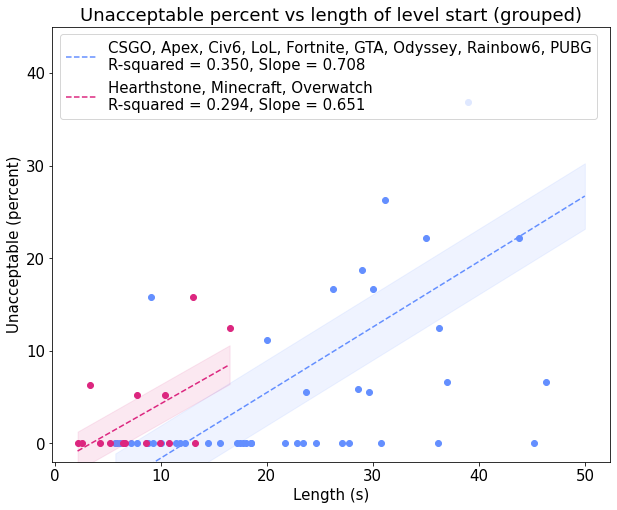

In [13]:
reduced_blue = df.query( 'Game == ["hearthstone","minecraft","overwatch"]' )
reduced_blue = reduced_blue[reduced_blue['Type'] == 'level']
reduced_blue = reduced_blue.groupby(['Time'])[['Unacceptable', 'ones']].sum()
reduced_blue['Unacceptable %'] = reduced_blue['Unacceptable'] / reduced_blue['ones'] * 100

reduced_red = df.query( 'Game == ["apex","civ6","gta","fortnite","odyssey","rainbow6","lol","pubg","csgo"]' )
reduced_red = reduced_red[reduced_red['Type'] == 'level']
reduced_red = reduced_red.groupby(['Time'])[['Unacceptable', 'ones']].sum()
reduced_red['Unacceptable %'] = reduced_red['Unacceptable'] / reduced_red['ones'] * 100

title = 'Unacceptable percent vs length of level start (grouped)'

plt.figure(figsize=(10, 8))
xb = reduced_blue.index
yb = reduced_blue['Unacceptable %']
xr = reduced_red.index
yr = reduced_red['Unacceptable %']
plt.xlabel('Length (s)')
plt.ylabel('Unacceptable (percent)')
plt.title(title)

plotSeries(xr, yr, colors[0], colors[0], "CSGO, Apex, Civ6, LoL, Fortnite, GTA, Odyssey, Rainbow6, PUBG")
plotSeries(xb, yb, colors[2], colors[2], "Hearthstone, Minecraft, Overwatch")

plt.ylim(-2, 45)
plt.savefig(title + '.png')
plt.show()

## Fraction per game

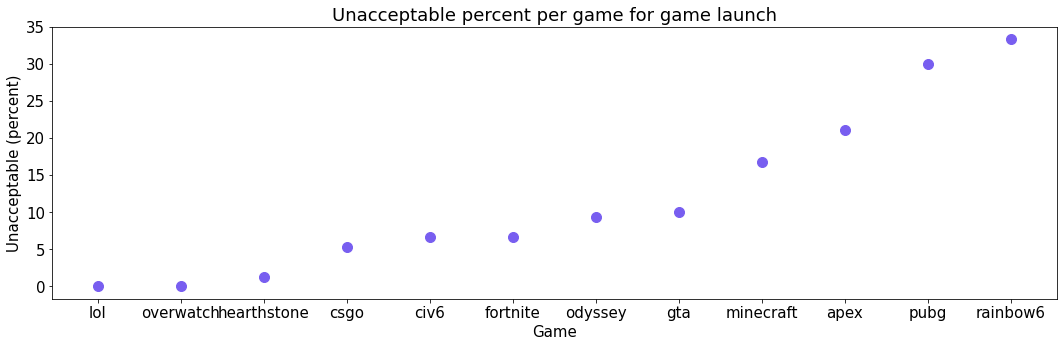

In [14]:
reduced = df[df['Type'] == 'load']
reduced = reduced.groupby(['Game'])[['Unacceptable', 'ones']].sum()
reduced['Unacceptable %'] = reduced['Unacceptable'] / reduced['ones'] * 100
reduced = reduced.sort_values(by=['Unacceptable %'])

title = 'Unacceptable percent per game for game launch'

plt.figure(figsize=(18, 5))
x = reduced.index
y = reduced['Unacceptable %']
plt.xlabel('Game')
plt.ylabel('Unacceptable (percent)')
plt.title(title)
plt.scatter(x, y, s=100, c=colors[1])
plt.savefig(title + '.png')
plt.show()

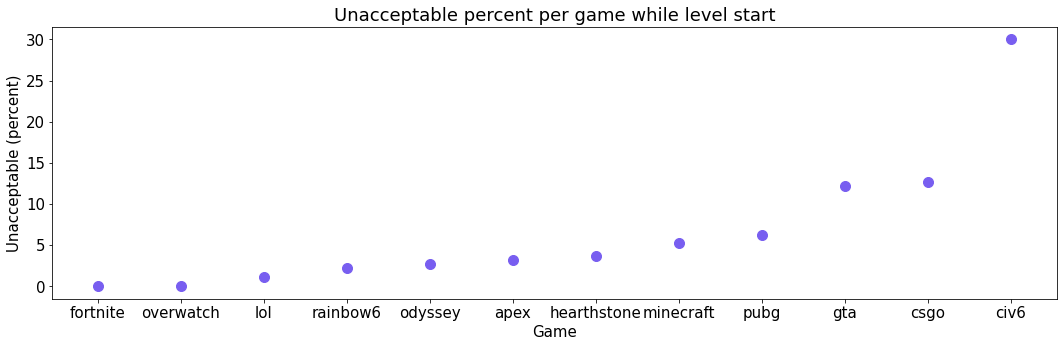

In [11]:
reduced = df[df['Type'] == 'level']
reduced = reduced.groupby(['Game'])[['Unacceptable', 'ones']].sum()
reduced['Unacceptable %'] = reduced['Unacceptable'] / reduced['ones'] * 100
reduced = reduced.sort_values(by=['Unacceptable %'])

title = 'Unacceptable percent per game while level start'

plt.figure(figsize=(18, 5))
x = reduced.index
y = reduced['Unacceptable %']
plt.xlabel('Game')
plt.ylabel('Unacceptable (percent)')
plt.title(title)
plt.scatter(x, y, s=100, c=colors[1])
plt.savefig(title + '.png')
plt.show()

## Fraction per game load vs launch

In [12]:
unacceptable = df.groupby(['Game', 'Type'])['Unacceptable'].sum()
total = df.groupby(['Game', 'Type'])['Unacceptable'].size()
metrics4 = {}
for info, n_unacceptable in unacceptable.items():
    if info[1] not in metrics4:
        metrics4[info[1]] = {}
    metrics4[info[1]][info[0]] = n_unacceptable / total[info] * 100

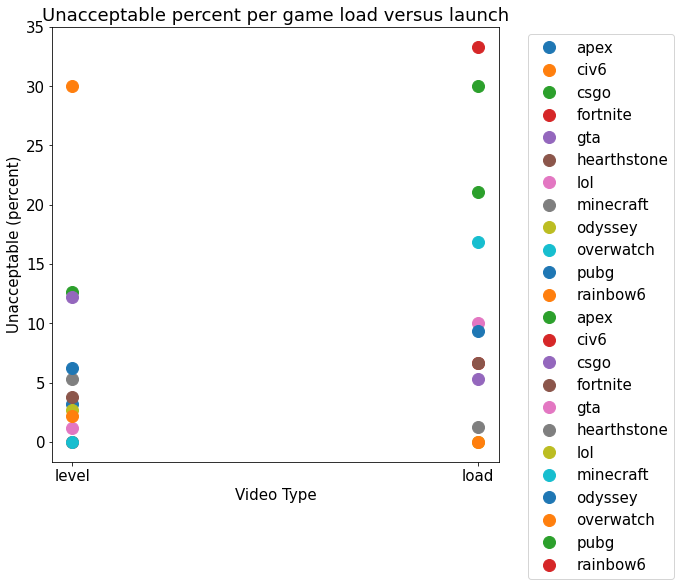

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
x = metrics4.keys()
y = metrics4.values()
plt.xlabel('Video Type')
plt.ylabel('Unacceptable (percent)')
plt.title('Unacceptable percent per game load versus launch')
for sim_type in metrics4:
    m = metrics4[sim_type]
    for game in m:
        stat = m[game]
        plt.plot(sim_type, stat, marker='o', linestyle='', ms=12, label=game)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')


## Fraction versus scaling (25-125)

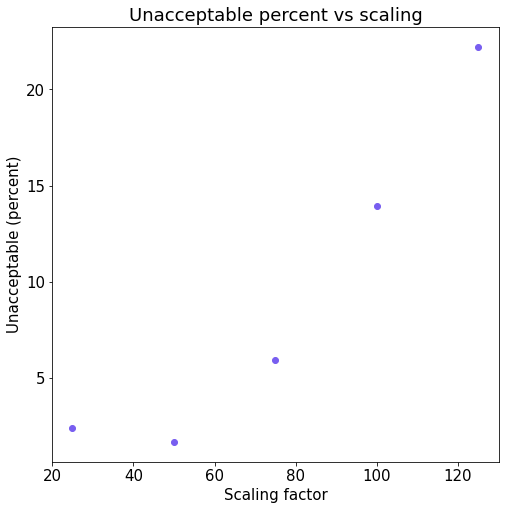

In [14]:
total = df.groupby(['Speed']).size()
unacceptable = df.groupby(['Speed'])['Unacceptable'].sum()

metrics2 = {}
for speed, total in total.items():
    metrics2[speed] = unacceptable[speed] / total
    
title = 'Unacceptable percent vs scaling'

plt.figure(figsize=(8, 8))
x = metrics2.keys()
y = metrics2.values()
y = [x * 100 for x in y]
plt.xlabel('Scaling factor')
plt.ylabel('Unacceptable (percent)')
plt.title(title)
plt.scatter(x, y, c=colors[1])
plt.savefig(title + '.png')
plt.show()

## Acceptable vs QoE

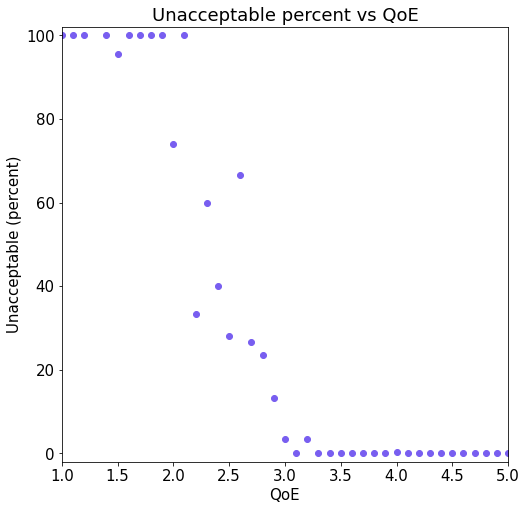

In [30]:
reduced = df.groupby(['Experience'])[['Unacceptable', 'ones']].sum()
reduced['Unacceptable %'] = reduced['Unacceptable'] / reduced['ones'] * 100

title = 'Unacceptable percent vs QoE'

plt.figure(figsize=(8, 8))
x = reduced.index
y = reduced['Unacceptable %']
plt.xlabel('QoE')
plt.ylabel('Unacceptable (percent)')
plt.title(title)
plt.scatter(x, y, c=colors[1])

plt.xlim(1, 5)
plt.ylim(-2, 102)

plt.savefig(title + '.png')
plt.show()

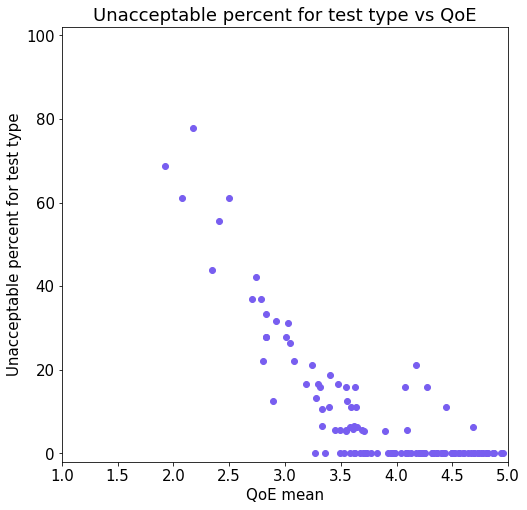

In [31]:
qoe_mean = df.groupby(['KEI'])['Experience'].mean()
unacceptable_mean = df.groupby(['KEI'])[['Unacceptable', 'ones']].sum()
unacceptable_mean['Unacceptable %'] = unacceptable_mean['Unacceptable'] / unacceptable_mean['ones'] * 100

title = 'Unacceptable percent for test type vs QoE'

plt.figure(figsize=(8, 8))
x = qoe_mean
y = unacceptable_mean['Unacceptable %']
plt.xlabel('QoE mean')
plt.ylabel('Unacceptable percent for test type')
plt.title(title)
plt.scatter(x, y, c=colors[1])
plt.ylim(-2, 102)
plt.xlim(1, 5)
plt.savefig(title + '.png')
plt.show()

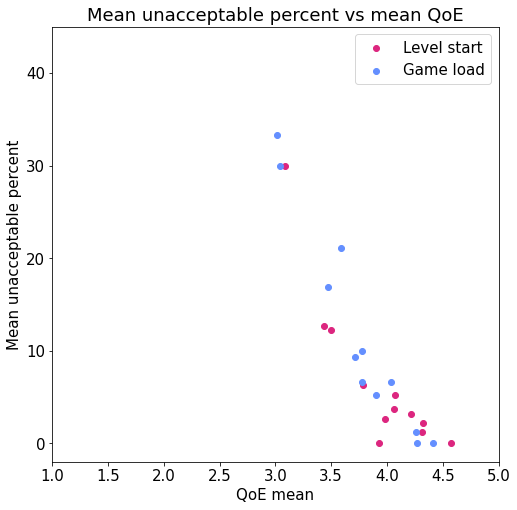

In [33]:
qoe_mean = df.groupby(['KEI'])['Experience'].mean()
unacceptable_mean = df.groupby(['KEI'])[['Unacceptable', 'ones']].sum()
unacceptable_mean['Unacceptable %'] = unacceptable_mean['Unacceptable'] / unacceptable_mean['ones'] * 100

reduced = unacceptable_mean
reduced['qoe_mean'] = qoe_mean
reduced['KEI'] = reduced.index
reduced[['game', 'type', 'info']] = reduced['KEI'].str.split('_', 2, expand=True)
reduced = reduced.groupby(['game', 'type']).mean()

load = reduced.query( 'type == ["load"]' )
level = reduced.query( 'type == ["level"]' )


title = 'Mean unacceptable percent vs mean QoE'

plt.figure(figsize=(8, 8))
x_load = load['qoe_mean']
y_load = load['Unacceptable %']

x_level = level['qoe_mean']
y_level = level['Unacceptable %']


plt.xlabel('QoE mean')
plt.ylabel('Mean unacceptable percent')
plt.title(title)

# plotSeries(x_load, y_load, colors[0], colors[0], "Game launch")
# plotSeries(x_level, y_level, colors[2], colors[2], "Level start")

plt.scatter(x_level, y_level, c=colors[2], label='Level start')
plt.scatter(x_load, y_load, c=colors[0], label='Game load')

plt.ylim(-2, 45)
plt.xlim(1, 5)
plt.legend(loc="upper right")
plt.savefig(title + '.png')
plt.show()